In [2]:
import pandas as pd
import numpy as np

In [3]:
from datetime import datetime
import os
import ssl

from wordcloud import WordCloud

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
import seaborn as sns

#### base original

In [4]:
df_org = pd.read_excel('Base_reviews.xlsx')
df_org.shape

(38561, 14)

In [5]:
df_org['target'] = df_org['overall_rating']

In [6]:
df_org = df_org[['reviewer_id', 'review_text', 'target']]

#### sample da base original

In [7]:
df = df_org.sample(frac = 0.1, random_state = 1)
df.shape

(3856, 3)

#### base_teste - utilizando list comprehention e pandas

In [8]:
df_teste = df_org.iloc[[x for x in df_org.index if x not in df.index]].sample(frac = 0.2, random_state = 1)
df_teste.shape

(6941, 3)

#### Count Vectorizer

In [9]:
cv = CountVectorizer(
                    ngram_range=(1,1)
                    , max_df = 1.0
                    , min_df = 1
                    , max_features = 10000
                    , binary=False
                    )

In [10]:
df['review_text'] = df['review_text'].str.lower()

In [11]:
#X = df.iloc[:, 1:-1].values  #dados de entrada
X = df['review_text']
y = df.iloc[:, 2].values  # saídas ou target

In [12]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste

In [13]:
cv_train_features = cv.fit_transform(X_train)
cv_test_features = cv.transform(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### LOGISTIC REGRESSION - Utilizando o CountVectorizer

In [15]:
from sklearn.linear_model import LogisticRegression

lr_cv = LogisticRegression(random_state= 42) # Nunca esqueça o random state

lr_cv.fit(cv_train_features, y_train)

accuracy_score(y_test, lr_cv.predict(cv_test_features))

c:\users\vinic\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.483160621761658

#### TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 10000) # Max feature é o tamanho do vocabulário

In [17]:
tf_train_features = tfidf.fit_transform(X_train) 
tf_test_features = tfidf.transform(X_test)

#### LOGISTIC REGRESSION - Utilizando o TF-IDF

In [18]:
from sklearn.linear_model import LogisticRegression

lr_tf = LogisticRegression(random_state= 42) # Nunca esqueça o random state

lr_tf.fit(tf_train_features, y_train)

accuracy_score(y_test, lr_tf.predict(tf_test_features))

0.49870466321243523

In [19]:
#realiza a previsão
y_pred = lr_tf.predict(tf_test_features)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.70      0.71       122
           2       0.00      0.00      0.00        39
           3       0.38      0.25      0.30        80
           4       0.36      0.33      0.34       223
           5       0.52      0.67      0.59       308

    accuracy                           0.50       772
   macro avg       0.39      0.39      0.39       772
weighted avg       0.46      0.50      0.48       772



c:\users\vinic\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vinic\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vinic\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

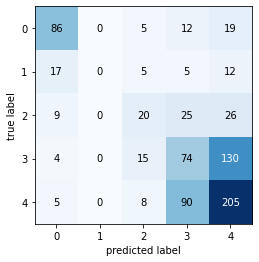

In [21]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Calcular o tamanho da Amostra para uma População de Número Desconhecido

Esta equação é para um tamanho de população desconhecido ou muito grande.

In [12]:
z_score = 1.96
std_dev = 0.5
margin_error = 0.05

In [13]:
(((z_score)**2) * std_dev*(1-std_dev)) / (margin_error)**2

384.1599999999999